In [1]:
import os
import math
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()

np.random.seed(0)

In [2]:
data = 'data_apr_1'
path_file = os.sep.join([data, 'studium_dim.csv'])
studium_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data, 'student_dim.csv'])
student_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data, 'predmet_dim.csv'])
predmet_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data, 'prihlaska_dim.csv'])
prihlaska_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join(['created_data', 'klasifikace_fact_changed.csv'])
klasifikace_fact_changed = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'studium_dim_changed.csv'])
studium_dim_changed = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'matrix_bak.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'matrix_mag.csv'])
matrix_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'courses_matrix_bak.csv'])
courses_matrix_bak = pd.read_csv(path_file)

path_file = os.sep.join(['created_data', 'courses_matrix_mag.csv'])
courses_matrix_mag = pd.read_csv(path_file)

path_file = os.sep.join(['created_data', 'failed_students_bak.npy'])
failed_students_bak = np.load(path_file)
path_file = os.sep.join(['created_data', 'successful_students_bak.npy'])
successful_students_bak = np.load(path_file)

path_file = os.sep.join(['created_data', 'failed_students_mag.npy'])
failed_students_mag = np.load(path_file)
path_file = os.sep.join(['created_data', 'successful_students_mag.npy'])
successful_students_mag = np.load(path_file)

path_file = os.sep.join(['created_data', 'klasifikace_fact_bak_09.csv'])
klasifikace_fact_bak_09 = pd.read_csv(path_file, sep=",")
path_file = os.sep.join(['created_data', 'klasifikace_fact_mag_09.csv'])
klasifikace_fact_mag_09 = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'courses_tran_id_kod.pkl'])
file = open(path_file, 'rb')
courses_tran_id_kod = pickle.load(file)

path_file = os.sep.join(['created_data', 'courses_tran_kod_id.pkl'])
file = open(path_file, 'rb')
courses_tran_kod_id = pickle.load(file)

In [3]:
courses_matrix_bak = courses_matrix_bak.set_index('studium_id')
courses_matrix_mag = courses_matrix_mag.set_index('studium_id')

### Vyplněnost prihlaska_dim

In [4]:
prihl_studium = prihlaska_dim.merge(studium_dim_changed, how='inner', on='studium_id')

<BarContainer object of 14 artists>

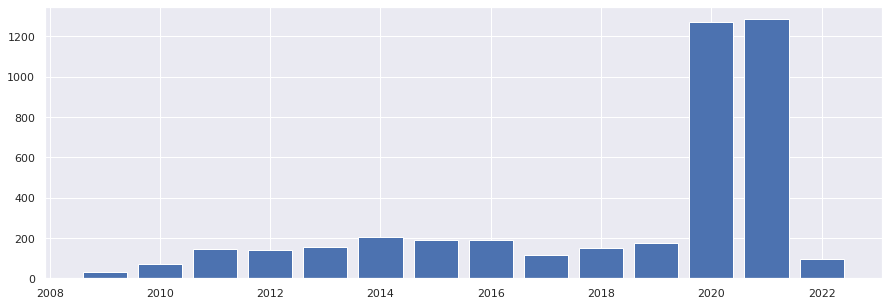

In [5]:
plt.figure(figsize=(15,5))

x = np.array(prihl_studium.datum_zahajeni.value_counts().sort_index().index)
y = np.array(prihl_studium.datum_zahajeni.value_counts().sort_index().values)

plt.grid(True)  
plt.bar(x, y)

<BarContainer object of 2 artists>

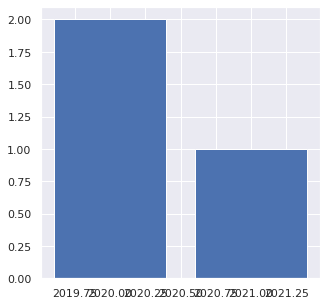

In [6]:
plt.figure(figsize=(5,5))

x = np.array(prihl_studium[prihl_studium.ss_prumer_prumeru.notna()].datum_zahajeni.value_counts().sort_index().index)
y = np.array(prihl_studium[prihl_studium.ss_prumer_prumeru.notna()].datum_zahajeni.value_counts().sort_index().values)

plt.grid(True) 
plt.bar(x, y)

### Počet neúspěšných studentů bakalářského studia v závislosti na ročníku, ve kterém končí

#### Bakalář

<BarContainer object of 8 artists>

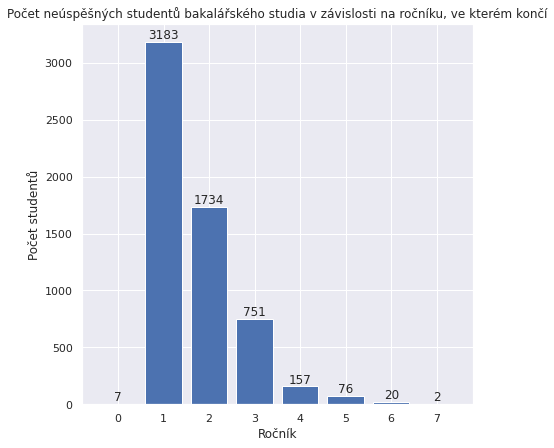

In [7]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_bak)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_bak)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Počet neúspěšných studentů bakalářského studia v závislosti na ročníku, ve kterém končí')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='medium')

plt.bar(x, y)

#### Magistr

<BarContainer object of 5 artists>

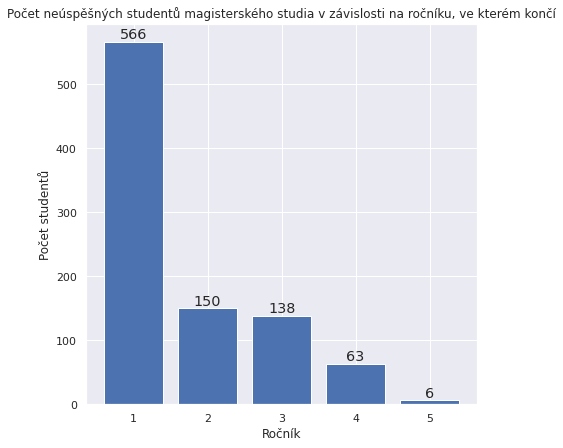

In [8]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_mag)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_mag)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Počet neúspěšných studentů magisterského studia v závislosti na ročníku, ve kterém končí')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

### Ročník, ve kterém studenti ukončí úspěšně studium

#### Bakalář

<BarContainer object of 6 artists>

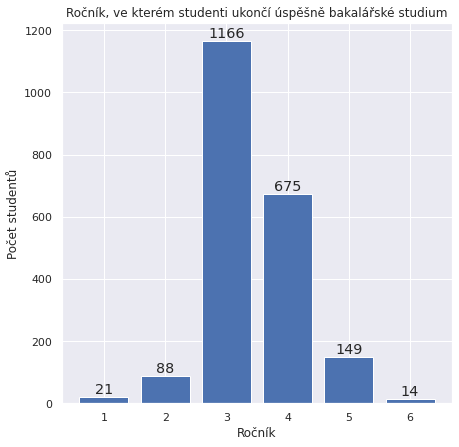

In [9]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_bak)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_bak)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Ročník, ve kterém studenti ukončí úspěšně bakalářské studium')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

#### Magistr

<BarContainer object of 5 artists>

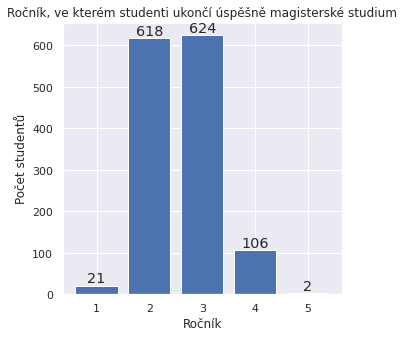

In [10]:
plt.figure(figsize=(5,5))

x = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_mag)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_mag)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Ročník, ve kterém studenti ukončí úspěšně magisterské studium')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

## Úspěch a neúspěch studentů podle roku nástupu

In [11]:
studium_dim_c = studium_dim.copy(deep=True
                                )
# zmena datum_zahajeni pouze na rok a zmena ze stringu na int
studium_dim_c['datum_zahajeni'] = studium_dim_c['datum_zahajeni'].apply(lambda x: x.split('-')[0])

studium_dim_c['datum_ukonceni'] = studium_dim_c['datum_ukonceni'].fillna('0')
studium_dim_c['datum_ukonceni'] = studium_dim_c['datum_ukonceni'].apply(lambda x: x.split('-')[0])

studium_dim_c['rok_maturity'] = studium_dim_c['rok_maturity'].fillna('0')
studium_dim_c['rok_maturity'] = studium_dim_c['rok_maturity'].apply(lambda x: x.split('-')[0])

studium_dim_c['datum_zahajeni'] = pd.to_numeric(studium_dim_c['datum_zahajeni'])
studium_dim_c['datum_ukonceni'] = pd.to_numeric(studium_dim_c['datum_ukonceni'])
studium_dim_c['rok_maturity'] = pd.to_numeric(studium_dim_c['rok_maturity'])

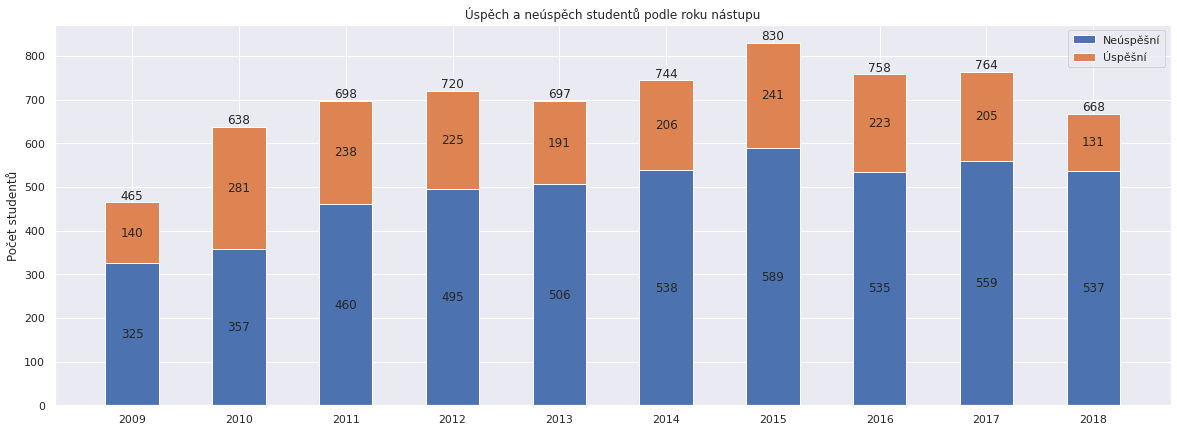

In [12]:
succ_stud = np.array(studium_dim_c[
    (studium_dim_c.studium_id.isin(successful_students_bak))
    & (studium_dim_c.datum_zahajeni != 2019)
    & (studium_dim_c.datum_zahajeni != 2020)
    & (studium_dim_c.datum_zahajeni != 2021)
    & (studium_dim_c.datum_zahajeni != 2022)]['datum_zahajeni'].value_counts().sort_index().values)
fail_stud = np.array(studium_dim_c[
    (studium_dim_c.studium_id.isin(failed_students_bak))
    & (studium_dim_c.datum_zahajeni != 2019)
    & (studium_dim_c.datum_zahajeni != 2020)
    & (studium_dim_c.datum_zahajeni != 2021)
    & (studium_dim_c.datum_zahajeni != 2022)]['datum_zahajeni'].value_counts().sort_index().values)

fig, ax = plt.subplots()
labels = studium_dim_c[(studium_dim_c.datum_zahajeni != 2021)
                       & (studium_dim_c.datum_zahajeni != 2019)
                       & (studium_dim_c.datum_zahajeni != 2020)
                      & (studium_dim_c.datum_zahajeni != 2022)].datum_zahajeni.sort_values(ascending=True).unique()
width = 0.5
ind = np.arange(len(labels))
p1 = ax.bar(ind, fail_stud, width, label='Neúspěšní')
p2 = ax.bar(ind, succ_stud, width,
            bottom=fail_stud, label='Úspěšní')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Počet studentů')
ax.set_title('Úspěch a neúspěch studentů podle roku nástupu')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)
fig.set_size_inches(20,7)

plt.show()

### Rozdíl mezi rokem maturity a rokem nástupu v letech

#### Bakalář

<AxesSubplot:title={'center':'Rozdíl mezi rokem maturity a rokem nástupu v letech'}, xlabel='Rozdíl v letech', ylabel='Počet studentů'>

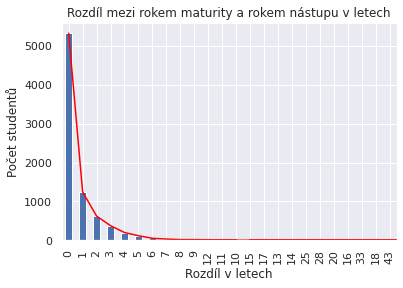

In [13]:
ax = matrix_bak.maturita_nastup_rozdil.value_counts().plot(color='red')
ax.set_xlabel('Rozdíl v letech')
ax.set_ylabel('Počet studentů')
matrix_bak.maturita_nastup_rozdil.value_counts().plot.bar(ax=ax, title='Rozdíl mezi rokem maturity a rokem nástupu v letech')

### Úspěšnost studentů v souvislosti s rozdílem mezi rokem maturity a nástupu do studia - Bakalář

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: Matpl

<AxesSubplot:title={'center':'Více než 10 let'}, ylabel='dostudoval_uspesne'>

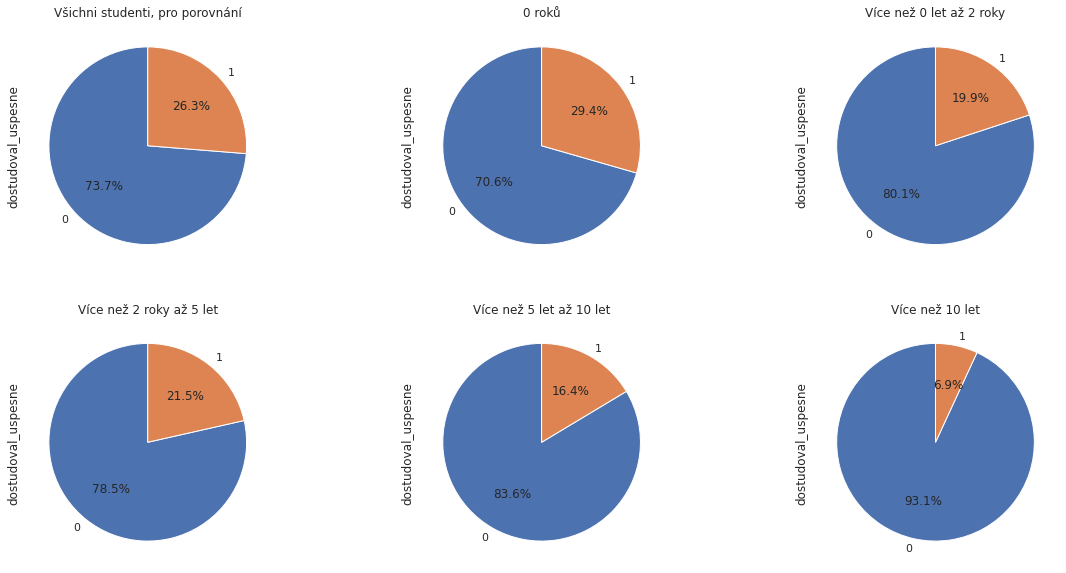

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(231)
matrix_bak.dostudoval_uspesne.value_counts().plot.pie(title="Všichni studenti, pro porovnání", 
                                                      startangle=90, autopct='%1.1f%%')
plt.subplot(232)
matrix_bak[matrix_bak.maturita_nastup_rozdil == 0].dostudoval_uspesne.value_counts().plot.pie(title="0 roků", 
                                                                                              startangle=90, autopct='%1.1f%%')
plt.subplot(233)
matrix_bak[(matrix_bak.maturita_nastup_rozdil != 0)
          & (matrix_bak.maturita_nastup_rozdil <= 2)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 0 let až 2 roky",
                                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(234)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 2)
          & (matrix_bak.maturita_nastup_rozdil <= 5)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 2 roky až 5 let", 
                                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(235)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 5)
          & (matrix_bak.maturita_nastup_rozdil <= 10)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 5 let až 10 let", 
                                                                                                  startangle=90, autopct='%1.1f%%')
plt.subplot(236)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 10)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 10 let", 
                                                                                                startangle=90, autopct='%1.1f%%')

### Úspěšnost studentů s českou příslušností a úspěšnost studentů s cizí státní příslušností

#### Bakalář

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'cizí státní příslušnost'}, ylabel='dostudoval_uspesne'>

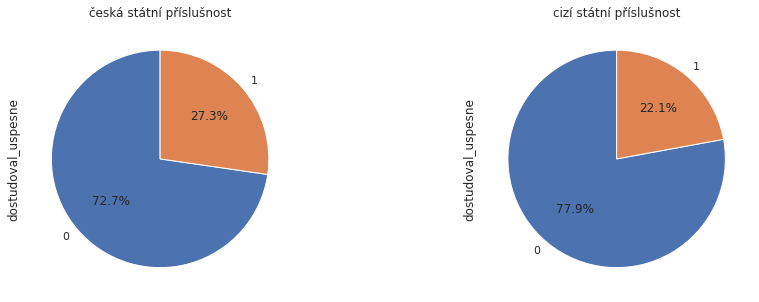

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_bak[(matrix_bak.je_cech == 1)].dostudoval_uspesne.value_counts().plot.pie(title="česká státní příslušnost", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_bak[(matrix_bak.je_cech == 0)].dostudoval_uspesne.value_counts().plot.pie(title="cizí státní příslušnost", startangle=90, autopct='%1.1f%%')

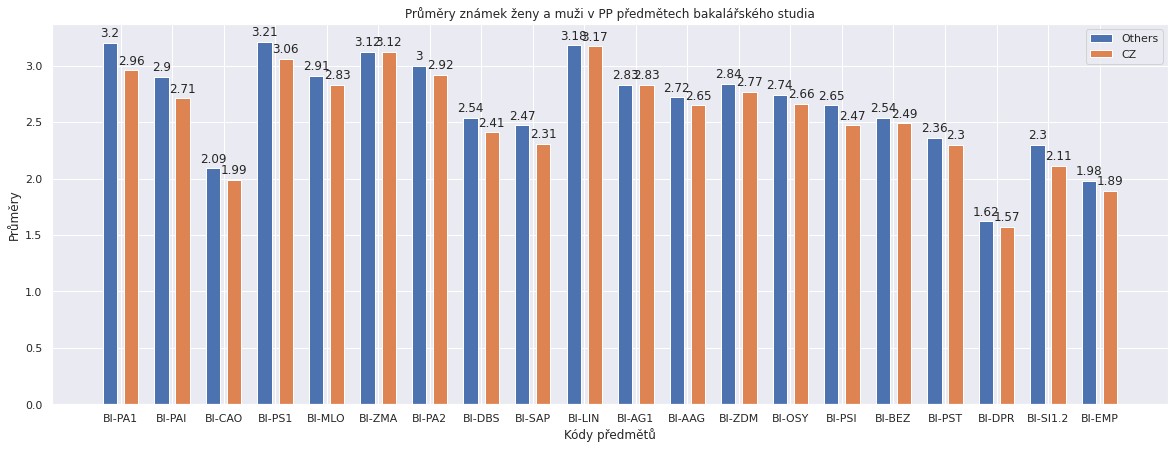

In [16]:
width = 0.35 

cz_bak_id = matrix_bak[matrix_bak.je_cech == 1].studium_id.unique()
cz_bak = courses_matrix_bak[courses_matrix_bak.index.isin(cz_bak_id)]

oth_bak_id = matrix_bak[matrix_bak.je_cech == 0].studium_id.unique()
oth_bak = courses_matrix_bak[courses_matrix_bak.index.isin(oth_bak_id)]

labels = np.array(courses_matrix_bak.columns)
oth_means = np.array(round(oth_bak.mean(), 2).values)
cz_means = np.array(round(cz_bak.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, oth_means, width, label='Others')
rects2 = ax.bar(x + width/2 + 0.12, cz_means, width, label='CZ')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek ženy a muži v PP předmětech bakalářského studia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

#### Magistr

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'cizí státní příslušnost'}, ylabel='dostudoval_uspesne'>

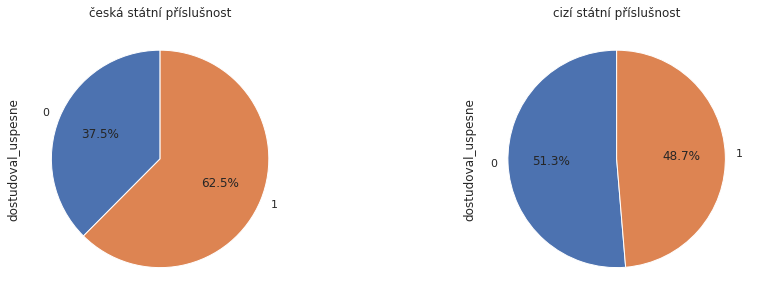

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_mag[(matrix_mag.je_cech == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="česká státní příslušnost", 
                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_mag[(matrix_mag.je_cech == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="cizí státní příslušnost", 
                                                                                 startangle=90, autopct='%1.1f%%')

### Úspěšnost studentů v souvislosti s pohlavím

#### Bakalář

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Ženy'}, ylabel='dostudoval_uspesne'>

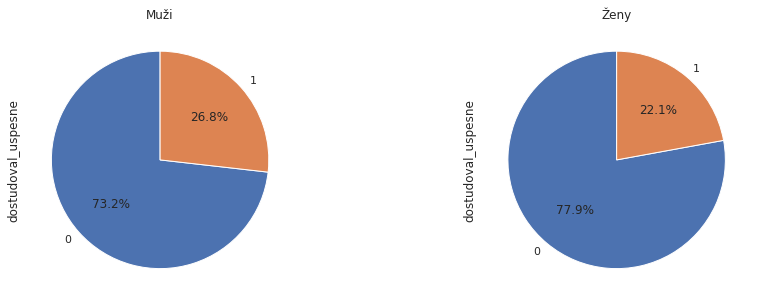

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_bak[(matrix_bak.pohlavi_kod == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Muži", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_bak[(matrix_bak.pohlavi_kod == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Ženy", startangle=90, autopct='%1.1f%%')

Text(0.5, 1.0, 'Průměry známek žen v PP předmětech bakalářského studia')

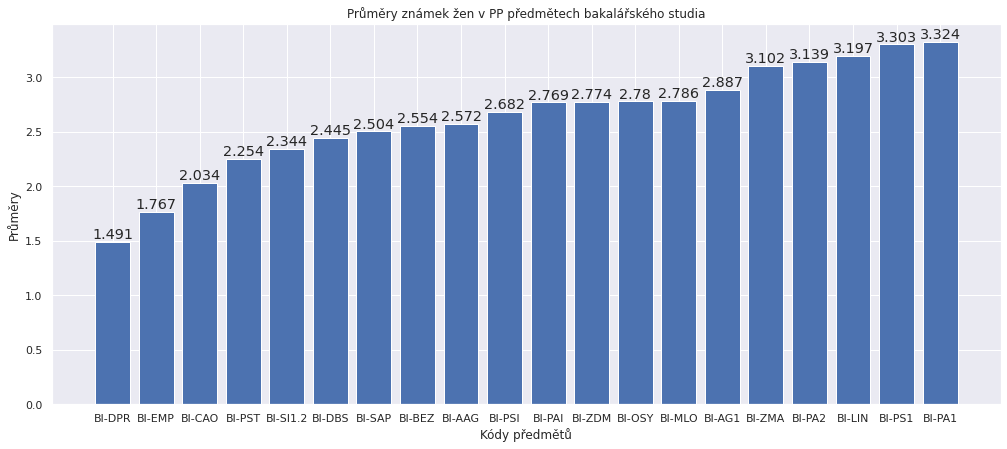

In [19]:
women_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 1].studium_id.unique()
women_bak = courses_matrix_bak[courses_matrix_bak.index.isin(women_bak_id)]

plt.figure(figsize=(17,7))

x = np.array(round(women_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(women_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek žen v PP předmětech bakalářského studia')

Text(0.5, 1.0, 'Průměry známek muži v PP předmětech bakalářského studia')

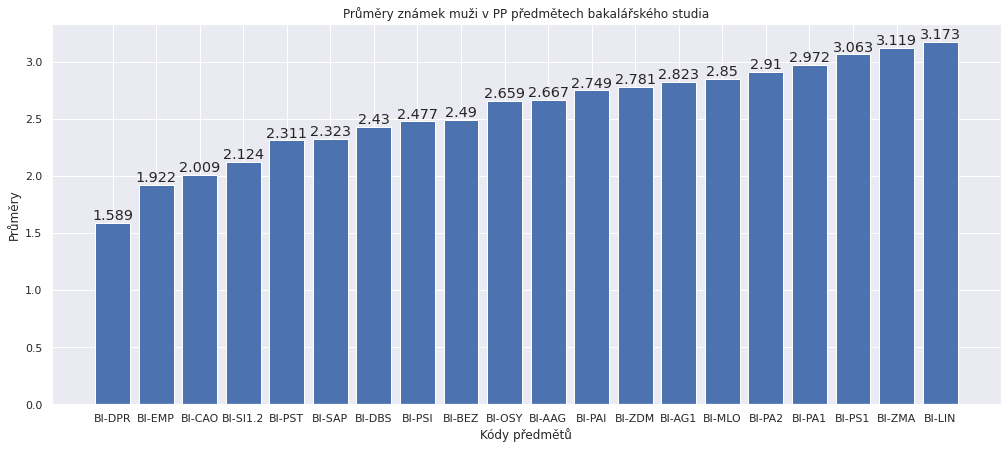

In [20]:
men_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 0].studium_id.unique()
men_bak = courses_matrix_bak[courses_matrix_bak.index.isin(men_bak_id)]

plt.figure(figsize=(17,7))

x = np.array(round(men_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(men_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek muži v PP předmětech bakalářského studia')

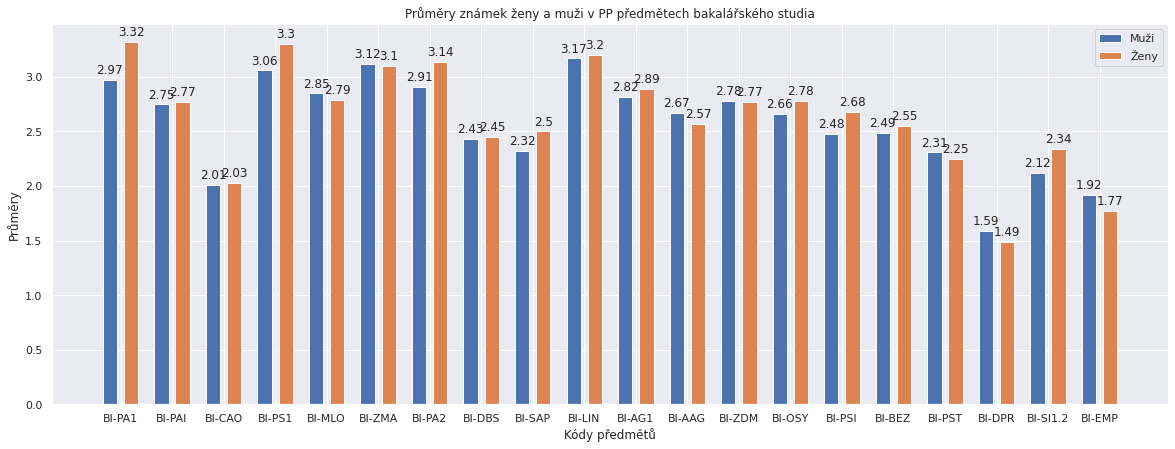

In [21]:
width = 0.35 

women_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 1].studium_id.unique()
women_bak = courses_matrix_bak[courses_matrix_bak.index.isin(women_bak_id)]

men_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 0].studium_id.unique()
men_bak = courses_matrix_bak[courses_matrix_bak.index.isin(men_bak_id)]

labels = np.array(courses_matrix_bak.columns)
men_means = np.array(round(men_bak.mean(), 2).values)
women_means = np.array(round(women_bak.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, men_means, width, label='Muži')
rects2 = ax.bar(x + width/2 + 0.12, women_means, width, label='Ženy')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek ženy a muži v PP předmětech bakalářského studia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

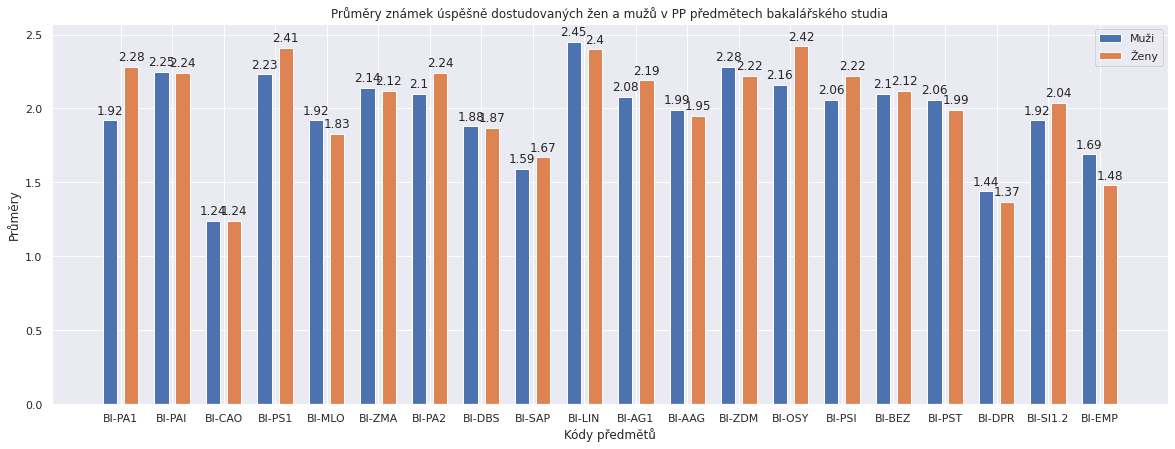

In [22]:
width = 0.35 

women_bak_id = matrix_bak[(matrix_bak.pohlavi_kod == 1)
                         & (matrix_bak.dostudoval_uspesne == 1)].studium_id.unique()
women_bak = courses_matrix_bak[courses_matrix_bak.index.isin(women_bak_id)]

men_bak_id = matrix_bak[(matrix_bak.pohlavi_kod == 0)
                         & (matrix_bak.dostudoval_uspesne == 1)].studium_id.unique()
men_bak = courses_matrix_bak[courses_matrix_bak.index.isin(men_bak_id)]

labels = np.array(courses_matrix_bak.columns)
men_means = np.array(round(men_bak.mean(), 2).values)
women_means = np.array(round(women_bak.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, men_means, width, label='Muži')
rects2 = ax.bar(x + width/2 + 0.12, women_means, width, label='Ženy')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek úspěšně dostudovaných žen a mužů v PP předmětech bakalářského studia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

#### Magistr

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Ženy'}, ylabel='dostudoval_uspesne'>

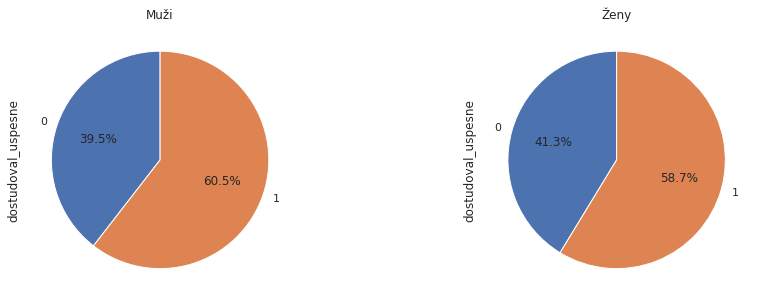

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_mag[(matrix_mag.pohlavi_kod == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Muži", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_mag[(matrix_mag.pohlavi_kod == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Ženy", startangle=90, autopct='%1.1f%%')

[0.  1.8 3.6 5.4]
['MI-PAA' 'MI-MPI' 'MI-PDP.16' 'MI-SPI.16']


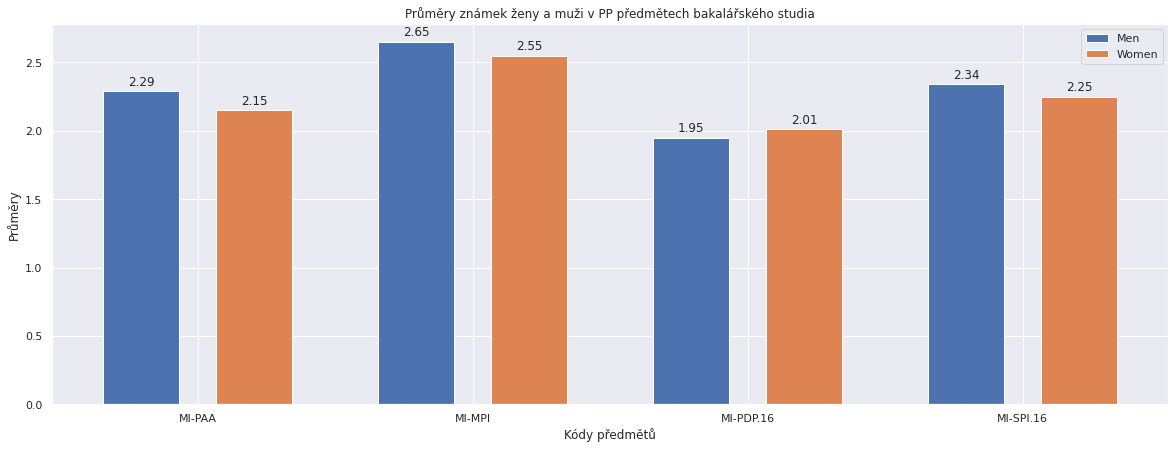

In [24]:
width = 0.35 

women_mag_id = matrix_mag[matrix_mag.pohlavi_kod == 1].studium_id.unique()
women_mag = courses_matrix_mag[courses_matrix_mag.index.isin(women_mag_id)]

men_mag_id = matrix_mag[matrix_mag.pohlavi_kod == 0].studium_id.unique()
men_mag = courses_matrix_mag[courses_matrix_mag.index.isin(men_mag_id)]

labels = np.array(courses_matrix_mag.columns)
men_means = np.array(round(men_mag.mean(), 2).values)
women_means = np.array(round(women_mag.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, men_means, width, label='Men')
rects2 = ax.bar(x + width/2 + 0.12, women_means, width, label='Women')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek ženy a muži v PP předmětech bakalářského studia')
print(x)
print(labels)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

### BI-DPR přehled

<AxesSubplot:title={'center':'BI-DPR absolvováno'}, ylabel='dostudoval_uspesne'>

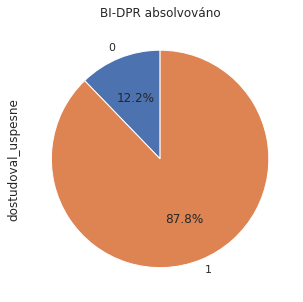

In [25]:
plt.figure(figsize=(15,5))

matrix_bak[(matrix_bak['BI-DPR'].notna())].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="BI-DPR absolvováno", startangle=90, autopct='%1.1f%%')

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Známky v BI-DPR u všech studentů'}, ylabel='BI-DPR'>

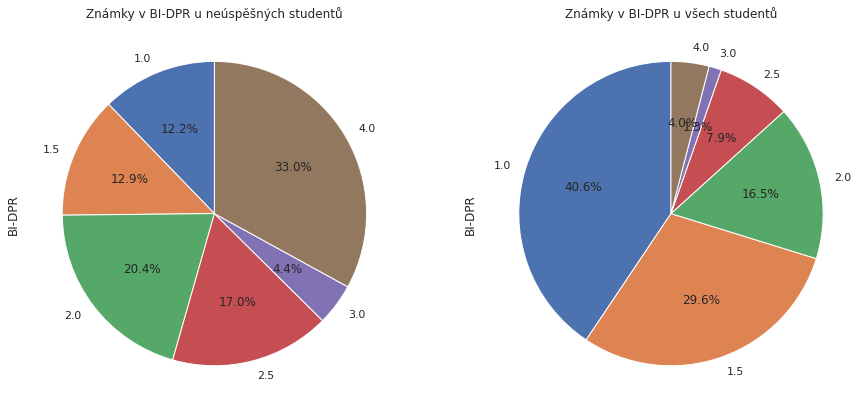

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(121)
matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(failed_students_bak))]['BI-DPR'].value_counts().sort_index().plot.pie(title="Známky v BI-DPR u neúspěšných studentů", startangle=90, autopct='%1.1f%%')

plt.subplot(122)
matrix_bak[(matrix_bak['BI-DPR'].notna())]['BI-DPR'].value_counts().sort_index().plot.pie(title="Známky v BI-DPR u všech studentů", startangle=90, autopct='%1.1f%%')

In [27]:
len(matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(failed_students_bak))])

294

In [28]:
len(matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(successful_students_bak))])

2113

## Ukázka průměrné známky a poměru úspěšných zápočtů/zakončení předmětů ku neúspěšným ve vybraných předmětech v průběhu let

### PA1

#### Průměrná známka v předmětu napříč semestry

<ipython-input-29-ddd11263105f>:13: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


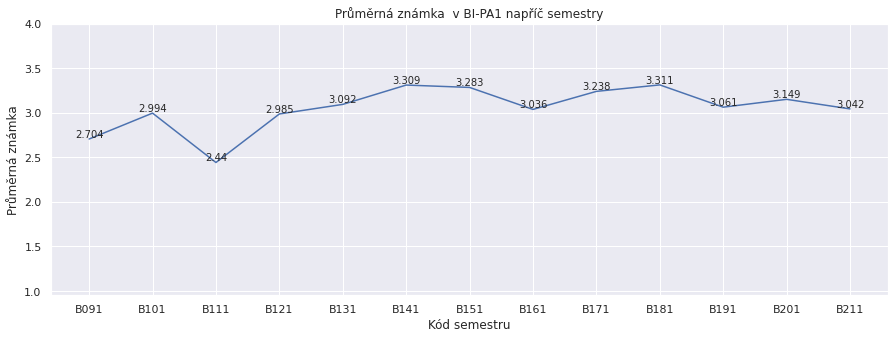

In [29]:
klasifikace_pa1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PA1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B202')]
plt.figure(figsize=(15,5))

x = np.array(klasifikace_pa1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_pa1.groupby('semestr_id')['znamka'].mean().values)

plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka  v BI-PA1 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')

plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným
* Je vidět velký rozdíl mezi úspěšnými zápočty a úspěšným absolvování předmětu v zimním semestru 2020, jednalo se o první semestr v online formě pro BI-PA1.

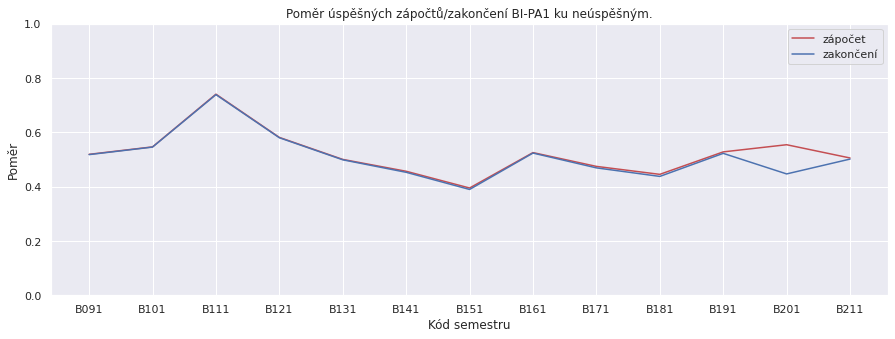

In [30]:
plt.figure(figsize=(15,5))

xa = klasifikace_pa1.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_pa1.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_pa1.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_pa1.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PA1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### ZMA

<ipython-input-31-e6122d555e14>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


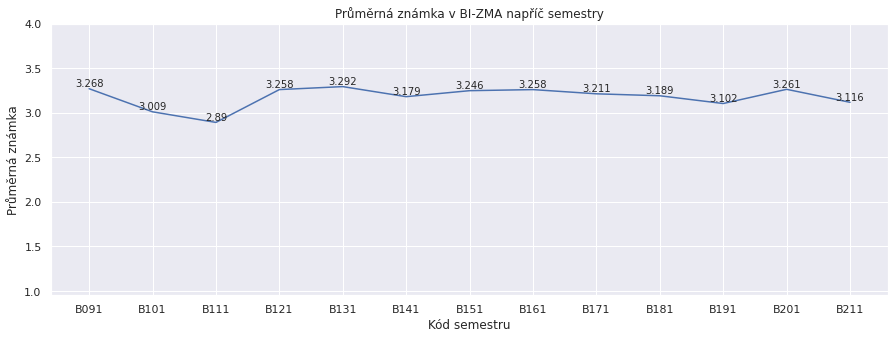

In [31]:
klasifikace_zma = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-ZMA'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_zma.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_zma.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-ZMA napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

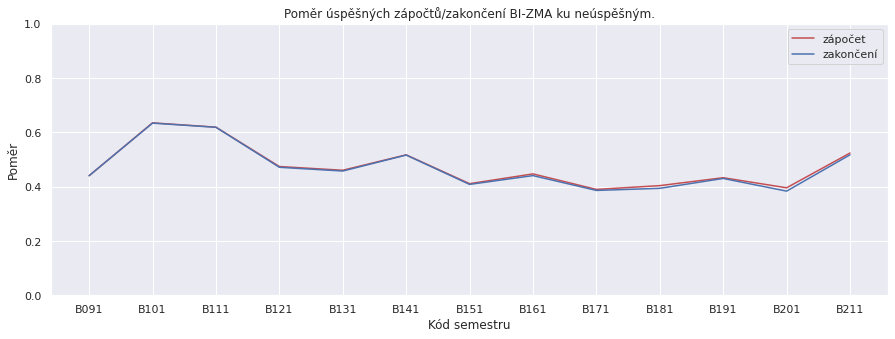

In [32]:
plt.figure(figsize=(15,5))

xa = klasifikace_zma.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_zma.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_zma.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_zma.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-ZMA ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### AAG
Bohužel u předmětu BI-AAG nemám záznamy z roku 2009.

<ipython-input-33-394f6ce0cca1>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


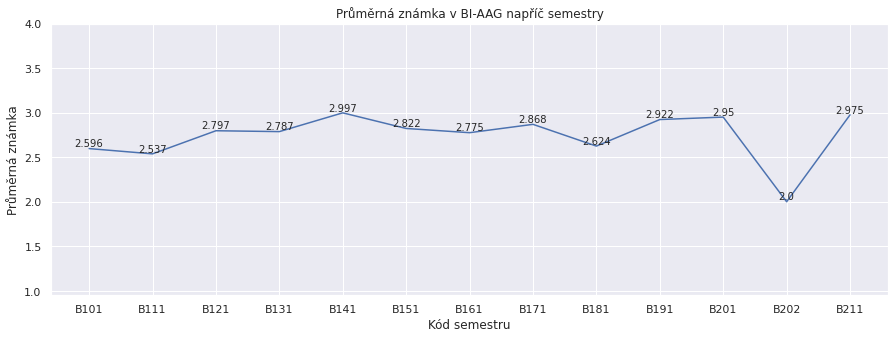

In [33]:
klasifikace_aag = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-AAG'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_aag.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_aag.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-AAG napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

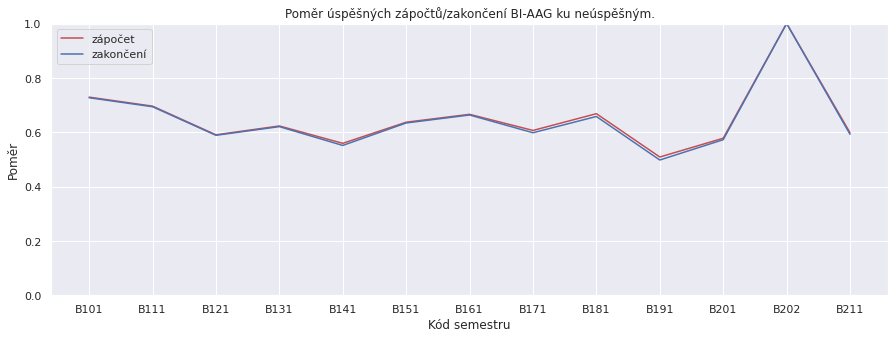

In [34]:
plt.figure(figsize=(15,5))

xa = klasifikace_aag.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_aag.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_aag.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_aag.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-AAG ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### AG1
* Předmět je vyučoován od roku 2016. Je na něm vidět rostoucí tendence průměru v průběhu let. 

<ipython-input-35-f4946b0441a2>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


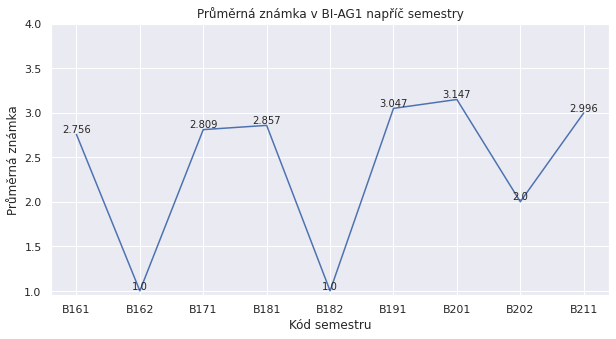

In [35]:
klasifikace_ag1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-AG1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(10,5))
x = np.array(klasifikace_ag1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_ag1.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-AG1 napříč semestry')
plt.grid(True)

plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

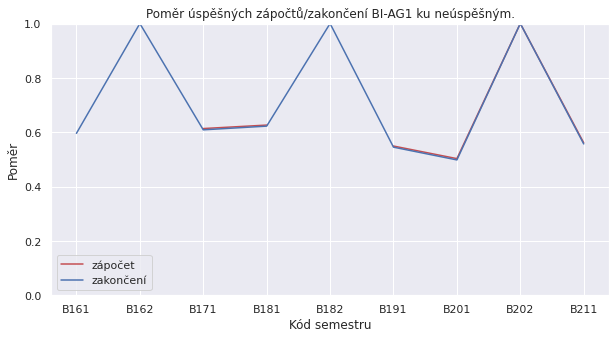

In [36]:
plt.figure(figsize=(10,5))

xa = np.array(klasifikace_ag1.groupby('semestr_id')['zapocteno'].mean().index)
ya = np.array(klasifikace_ag1.groupby('semestr_id')['zapocteno'].mean().values)

xb = np.array(klasifikace_ag1.groupby('semestr_id')['zakonceno'].mean().index)
yb = np.array(klasifikace_ag1.groupby('semestr_id')['zakonceno'].mean().values)

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-AG1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### CAO

<ipython-input-37-c8ea9f575ae0>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


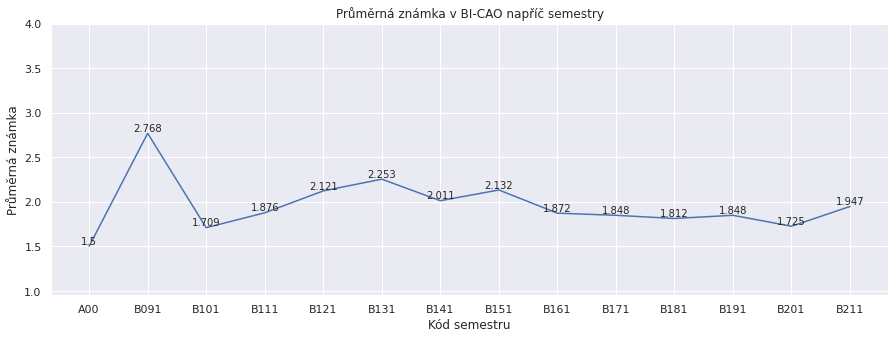

In [37]:
klasifikace_cao = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-CAO'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_cao.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_cao.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-CAO napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

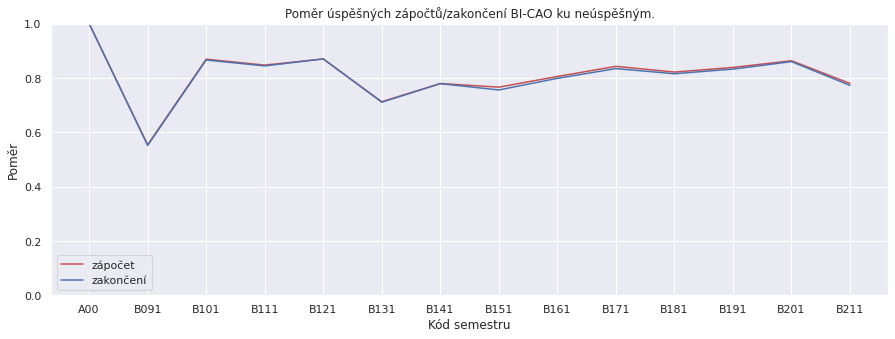

In [38]:
plt.figure(figsize=(15,5))

xa = klasifikace_cao.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_cao.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_cao.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_cao.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-CAO ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### LIN

<ipython-input-39-c6be150597e6>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


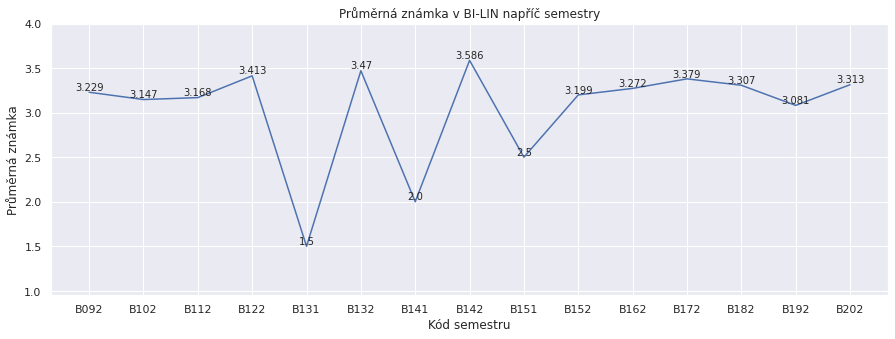

In [39]:
klasifikace_lin = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-LIN'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B212')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_lin.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_lin.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-LIN napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

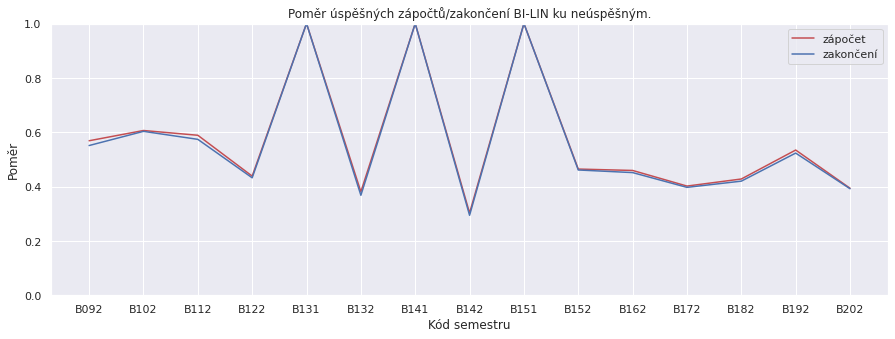

In [40]:
plt.figure(figsize=(15,5))

xa = klasifikace_lin.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_lin.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_lin.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_lin.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-LIN ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### MLO

<ipython-input-41-4b678473f93e>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


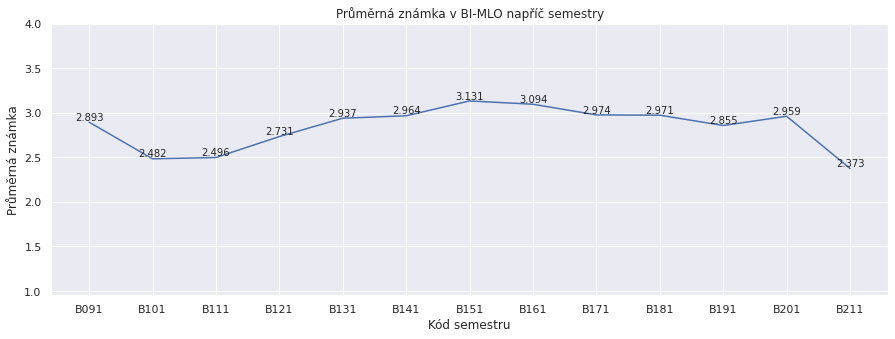

In [41]:
klasifikace_mlo = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-MLO'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A00')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_mlo.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_mlo.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-MLO napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

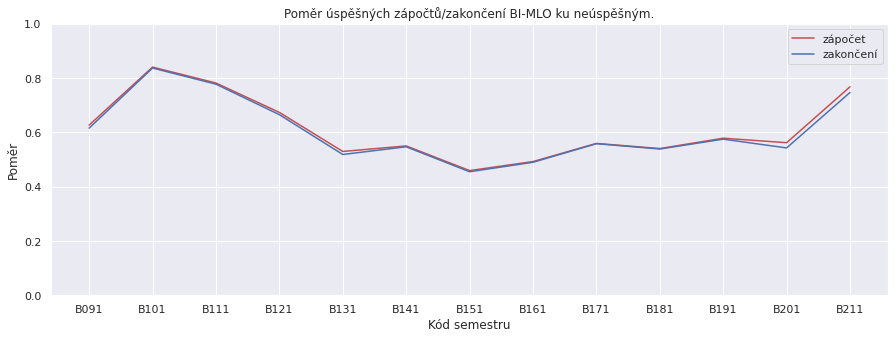

In [42]:
plt.figure(figsize=(15,5))

xa = klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-MLO ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [43]:
klasifikace_mlo[(klasifikace_mlo.zapocteno == 0)
               & (klasifikace_mlo.zakonceno == 1)]

,semestr_id,predmet_id,studium_id,zapocteno,zakonceno,znamka,poradi_zapisu


In [44]:
klasifikace_mlo[(klasifikace_mlo.zapocteno.isna())
               & (klasifikace_mlo.zakonceno == 1)]

,semestr_id,predmet_id,studium_id,zapocteno,zakonceno,znamka,poradi_zapisu


In [45]:
klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean()

semestr_id
B091    0.626106
B101    0.839607
B111    0.781065
B121    0.672993
B131    0.529231
B141    0.549575
B151    0.458886
B161    0.492042
B171    0.558824
B181    0.539974
B191    0.577994
B201    0.561453
B211    0.767123
Name: zapocteno, dtype: float64

In [46]:
klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean()

semestr_id
B091    0.615034
B101    0.836120
B111    0.776772
B121    0.664671
B131    0.518110
B141    0.546362
B151    0.454545
B161    0.489333
B171    0.557692
B181    0.538158
B191    0.574438
B201    0.542274
B211    0.746269
Name: zakonceno, dtype: float64

In [47]:
len(klasifikace_mlo[(klasifikace_mlo.zakonceno.isna())
                   & (klasifikace_mlo.semestr_id == 'B211')])

6

In [48]:
len(klasifikace_mlo[(klasifikace_mlo.zapocteno.isna())
                   & (klasifikace_mlo.semestr_id == 'B211')])

0

### PS1
* Do roku 2015 se vyučoval i v letním semestru. Výjimkou je rok 2010, kde se vyučoval pouze v zimním semestru. Od roku 2016 už pouze v zimním. Až na letní semestr 2011, ve kterém byl celkově nejhorší průměr, je vidět, že průměr v letních semestrech je lepší v porovnání se zimním semestrem ve stejném roce. Od roku 2016 je vidět klesající tendence průměru. V semestru B171 došlo k přechodu průběžných týdenních testů z papírové formy do systému Learnshell. Od semestru B191 se semestrální testy píši v systému Learnshell namísto dosavadního systému Progtest. Je zde vidět pokles průměru. Nejnižší průměr je v semestru B201, v tomto semestru zároveň došlo k prvnímu běhu předmětu v online formě. 

<ipython-input-49-914bd4081cb2>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


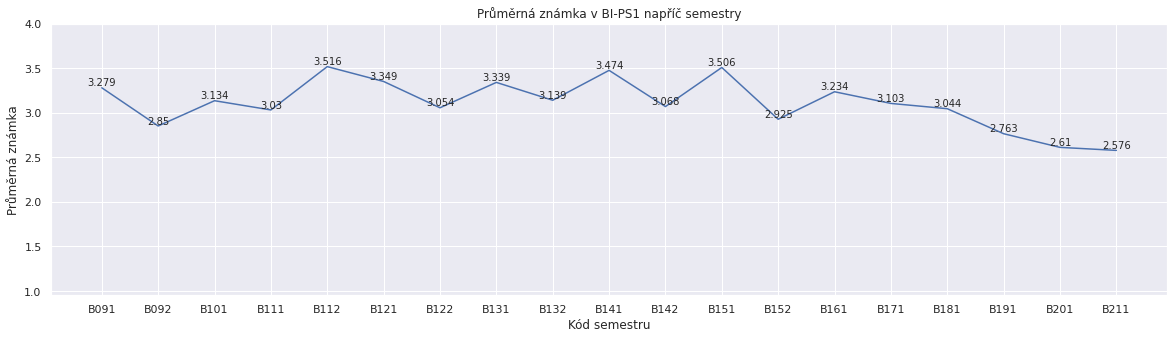

In [49]:
klasifikace_ps1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PS1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(20,5))
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
x = np.array(klasifikace_ps1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_ps1.groupby('semestr_id')['znamka'].mean().values)
plt.title('Průměrná známka v BI-PS1 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným
* BI-PS1 je zakončen klasifikovaným zápočtem, pro jsou oba poměry totožné. 

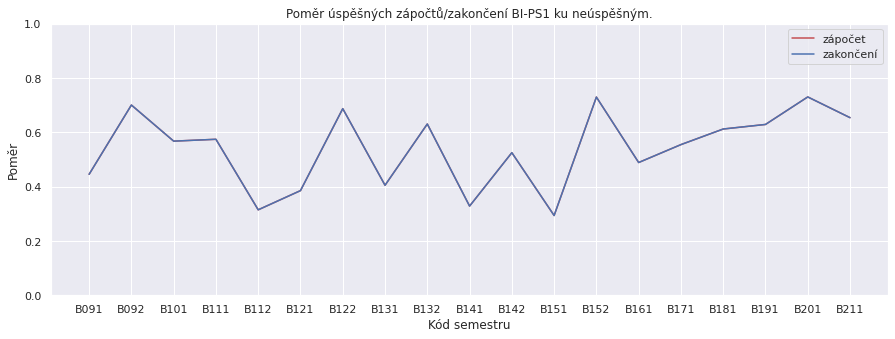

In [50]:
plt.figure(figsize=(15,5))

xa = klasifikace_ps1.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_ps1.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_ps1.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_ps1.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PS1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### PA2
* U BI-PA2 je dobře rozpoznatelný letní semestr 2019, ve kterém začala covidová opatření a poprvé se přešlo na online výuku. Průměrná známka se zlepšila ze známky E (3.0 <= E < 4.0) na známku C (2.0 <= C < 2.5). To může být způsobeno tím, že odpadla zkouška, která byla plně nahrazena pouze obhájením semestrální práce, průběžné testy si mohli studenti plnit sami doma a získat tak více bodů, či tím, že PA2 byl jeden z mála předmětů , kde byla již od začátku kvalitní online výuka (kvalitní záznamy přednášek a proseminářu). 

<ipython-input-51-0dbb15c7cfde>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


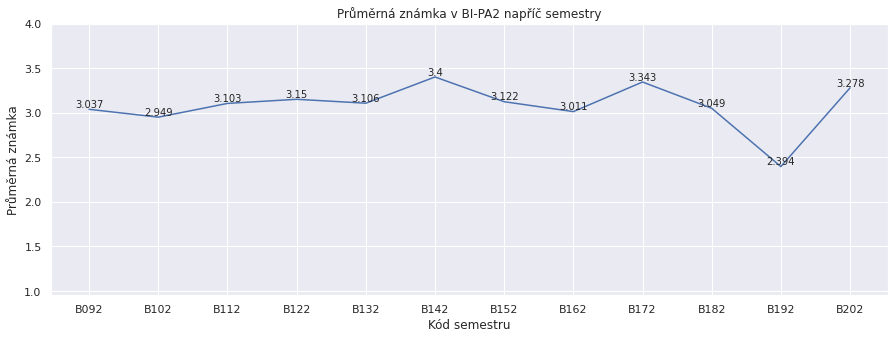

In [51]:
klasifikace_pa2 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PA2'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B212')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
x = np.array(klasifikace_pa2.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_pa2.groupby('semestr_id')['znamka'].mean().values)
plt.title('Průměrná známka v BI-PA2 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

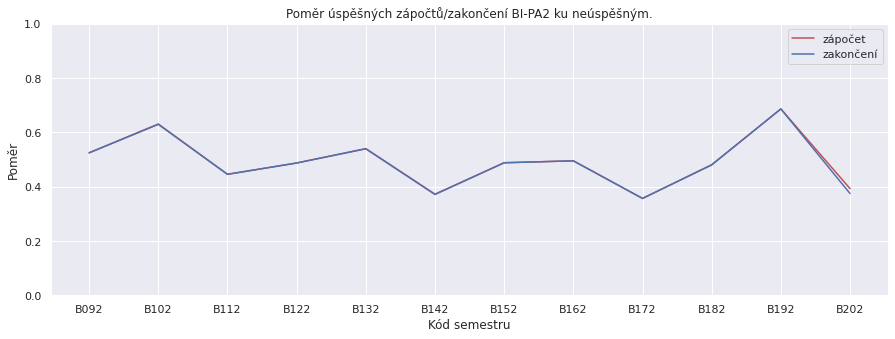

In [52]:
plt.figure(figsize=(15,5))

xa = klasifikace_pa2.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_pa2.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_pa2.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_pa2.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PA2 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### Průměry v povinných předmětech

#### Bakalář

Text(0.5, 1.0, 'Průměry známek všech studentů v PP předmětech bakalářského studia')

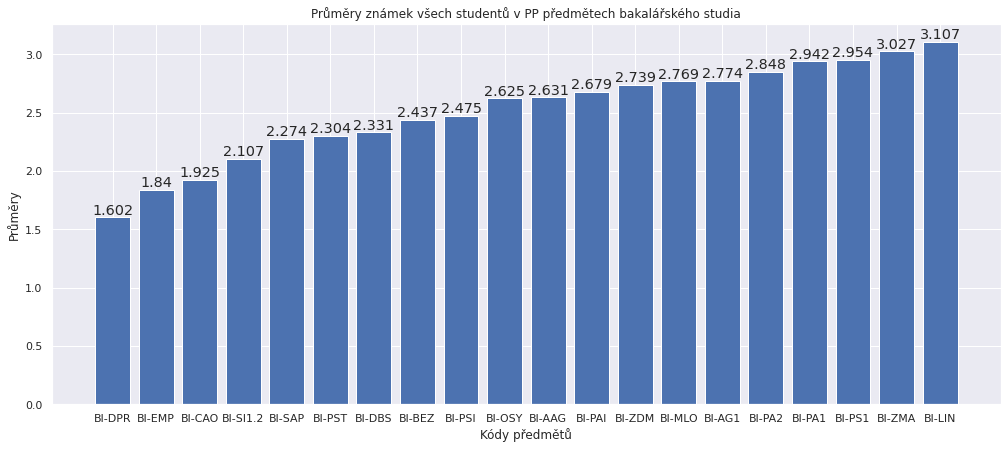

In [53]:
plt.figure(figsize=(17,7))

x = np.array(round(courses_matrix_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(courses_matrix_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek všech studentů v PP předmětech bakalářského studia')

##### Průměry úspěšných studentů

Text(0.5, 1.0, 'Průměry známek úspěšných studentů v PP předmětech bakalářského studia')

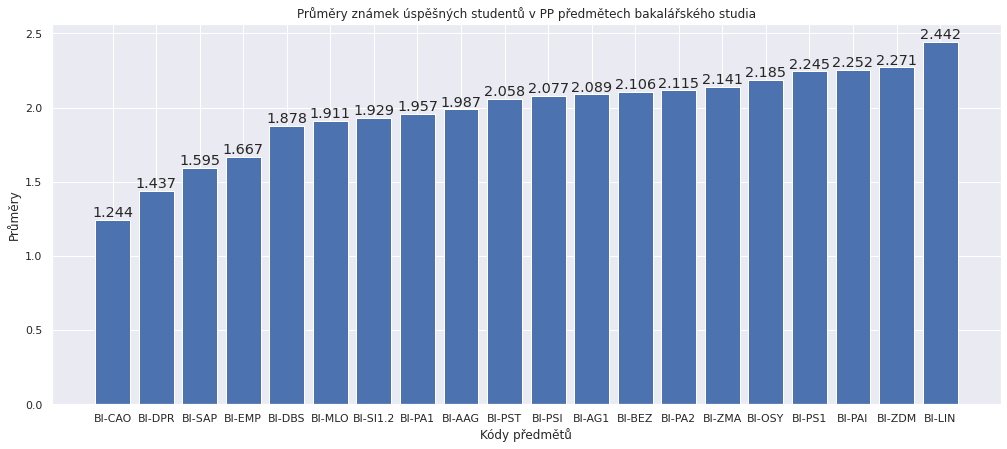

In [54]:
success_bak = courses_matrix_bak[courses_matrix_bak.index.isin(successful_students_bak)]

plt.figure(figsize=(17,7))

x = np.array(round(success_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(success_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek úspěšných studentů v PP předmětech bakalářského studia')

##### Průměry neúspěšných studentů

Text(0.5, 1.0, 'Průměry známek neúspěšných studentů v PP předmětech bakalářského studia')

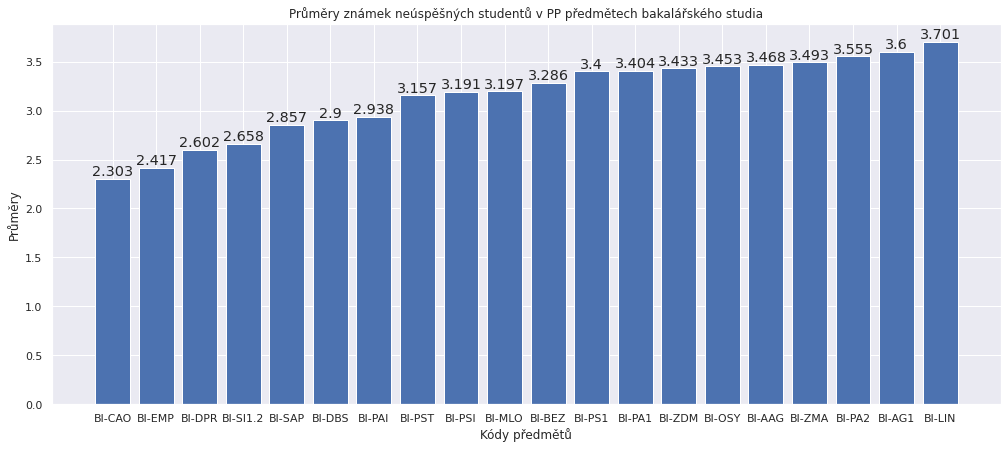

In [55]:
fail_bak = courses_matrix_bak[courses_matrix_bak.index.isin(failed_students_bak)]

plt.figure(figsize=(17,7))

x = np.array(round(fail_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek neúspěšných studentů v PP předmětech bakalářského studia')

#### Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia

Text(0.5, 1.0, 'Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia')

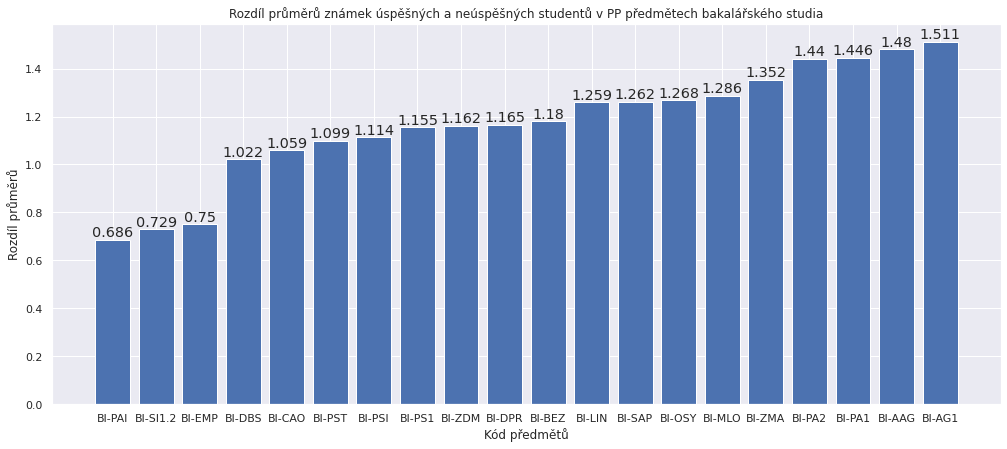

In [56]:
plt.figure(figsize=(17,7))

x = np.array(round(fail_bak.mean() - success_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_bak.mean() - success_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kód předmětů')
plt.ylabel('Rozdíl průměrů')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia')

#### Magistr

Text(0.5, 1.0, 'Průměry známek všech studentů v PP předmětech magisterského studia')

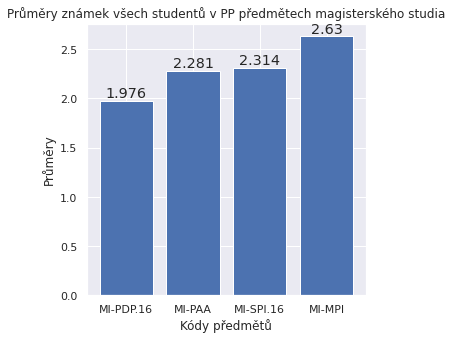

In [57]:
#courses_matrix_mag = courses_matrix_mag.set_index('studium_id')

plt.figure(figsize=(5,5))

x = np.array(round(courses_matrix_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(courses_matrix_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek všech studentů v PP předmětech magisterského studia')

#### Průměry úspěšných studentů

Text(0.5, 1.0, 'Průměry známek úspěšných studentů v PP předmětech magisterského studia')

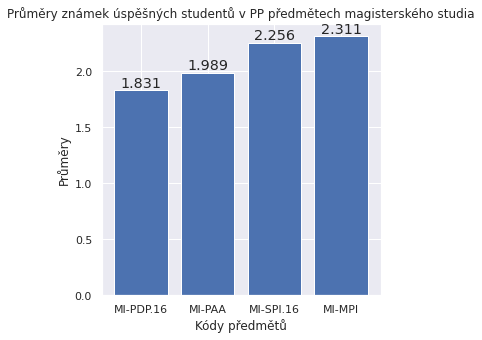

In [58]:
success_mag = courses_matrix_mag[courses_matrix_mag.index.isin(successful_students_mag)]

plt.figure(figsize=(5,5))

x = np.array(round(success_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(success_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek úspěšných studentů v PP předmětech magisterského studia')

#### Průměry neúspěšných studentů

Text(0.5, 1.0, 'Průměry známek neúspěšných studentů v PP předmětech magisterského studia')

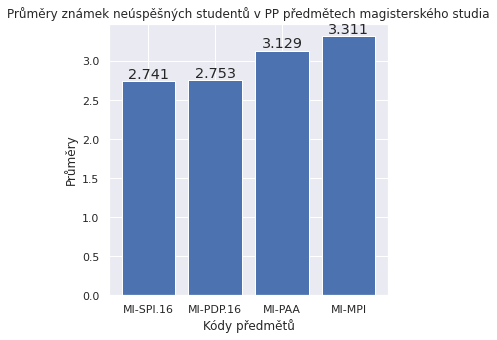

In [59]:
fail_mag = courses_matrix_mag[courses_matrix_mag.index.isin(failed_students_mag)]

plt.figure(figsize=(5, 5))

x = np.array(round(fail_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek neúspěšných studentů v PP předmětech magisterského studia')

#### Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia

Text(0.5, 1.0, 'Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech magisterského studia')

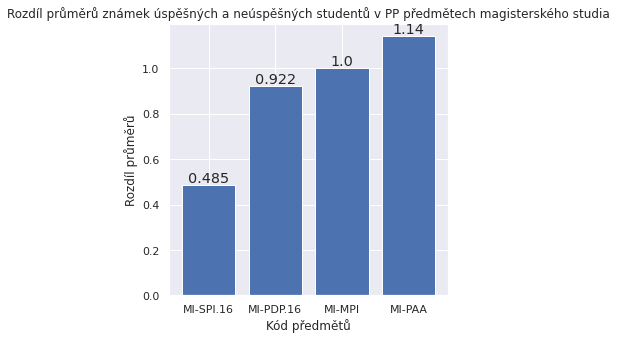

In [60]:
plt.figure(figsize=(5, 5))

x = np.array(round(fail_mag.mean() - success_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_mag.mean() - success_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kód předmětů')
plt.ylabel('Rozdíl průměrů')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech magisterského studia')

# Covidový rok a porovnání s jinými lety

## Matice překryvu úspěšnosti předmětů

In [61]:
courses = courses_matrix_bak.columns.unique()
courses_ids = []
for course in courses:
    courses_ids.append(courses_tran_kod_id[course])

courses_first_year = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_first_year_ids = []
for course in courses_first_year:
    courses_first_year_ids.append(courses_tran_kod_id[course])

### Covidový rok

In [62]:
covid_students_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()

<ipython-input-62-63c520b051dd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_students_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)


In [63]:
covid_PP = klasifikace_fact_changed[((klasifikace_fact_changed.semestr_id == 'B201')
                                       | (klasifikace_fact_changed.semestr_id == 'B202'))
                                & (klasifikace_fact_changed.predmet_id.isin(courses_ids))
                                & (klasifikace_fact_changed.studium_id.isin(covid_students_ids))]

In [64]:
covid_PP_corr = pd.DataFrame(columns = ['course_1', 'course_2', 'correlation'])
for course_1 in courses_first_year_ids:    
    for course_2 in courses_first_year_ids:
        course_1_passed = covid_PP[(covid_PP.predmet_id == course_1)
                        & (covid_PP.znamka != 4)
                        & (covid_PP.znamka.notna())]
        course_2_passed = covid_PP[(covid_PP.predmet_id == course_2)
                        & (covid_PP.znamka != 4)
                        & (covid_PP.znamka.notna())]
        course_1_2_passed = course_1_passed[course_1_passed.studium_id.isin(course_2_passed.studium_id.unique())]
        covid_PP_corr = covid_PP_corr.append({'course_1' : courses_tran_id_kod[course_1], 'course_2' : courses_tran_id_kod[course_2], 'correlation' : (len(course_1_2_passed.studium_id.unique()) / len(course_2_passed.studium_id.unique()))},  
                ignore_index = True)

In [65]:
corr_matrix = covid_PP_corr.astype({'correlation' : float}).pivot('course_1', 'course_2', 'correlation')

### Studenti s nástupovým rokem 2018

In [66]:
pre_covid_2018_students_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()

<ipython-input-66-6cb2e4fe87ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pre_covid_2018_students_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)


In [67]:
pre_covid_2018_PP = klasifikace_fact_changed[((klasifikace_fact_changed.semestr_id == 'B181')
                                       | (klasifikace_fact_changed.semestr_id == 'B182'))
                                & (klasifikace_fact_changed.predmet_id.isin(courses_ids))
                                & (klasifikace_fact_changed.studium_id.isin(pre_covid_2018_students_ids))]

In [68]:
pre_covid_2018_PP_corr = pd.DataFrame(columns = ['course_1', 'course_2', 'correlation'])
students_2018_sum = len(pre_covid_2018_students_ids)
for course_1 in courses_first_year_ids:    
    for course_2 in courses_first_year_ids:
        course_1_passed = pre_covid_2018_PP[(pre_covid_2018_PP.predmet_id == course_1)
                        & (pre_covid_2018_PP.znamka != 4)
                        & (pre_covid_2018_PP.znamka.notna())]
        course_2_passed = pre_covid_2018_PP[(pre_covid_2018_PP.predmet_id == course_2)
                        & (pre_covid_2018_PP.znamka != 4)
                        & (pre_covid_2018_PP.znamka.notna())]
        course_1_2_passed = course_1_passed[course_1_passed.studium_id.isin(course_2_passed.studium_id.unique())]
        pre_covid_2018_PP_corr = pre_covid_2018_PP_corr.append({'course_1' : courses_tran_id_kod[course_1], 'course_2' : courses_tran_id_kod[course_2], 'correlation' : (len(course_1_2_passed.studium_id.unique()) / len(course_2_passed.studium_id.unique()))},  
                ignore_index = True)

In [69]:
pre_covid_2018_corr_matrix = pre_covid_2018_PP_corr.astype({'correlation' : float}).pivot('course_1', 'course_2', 'correlation')

### Matice překryvu úspěšnosti předmětů pro oba roky

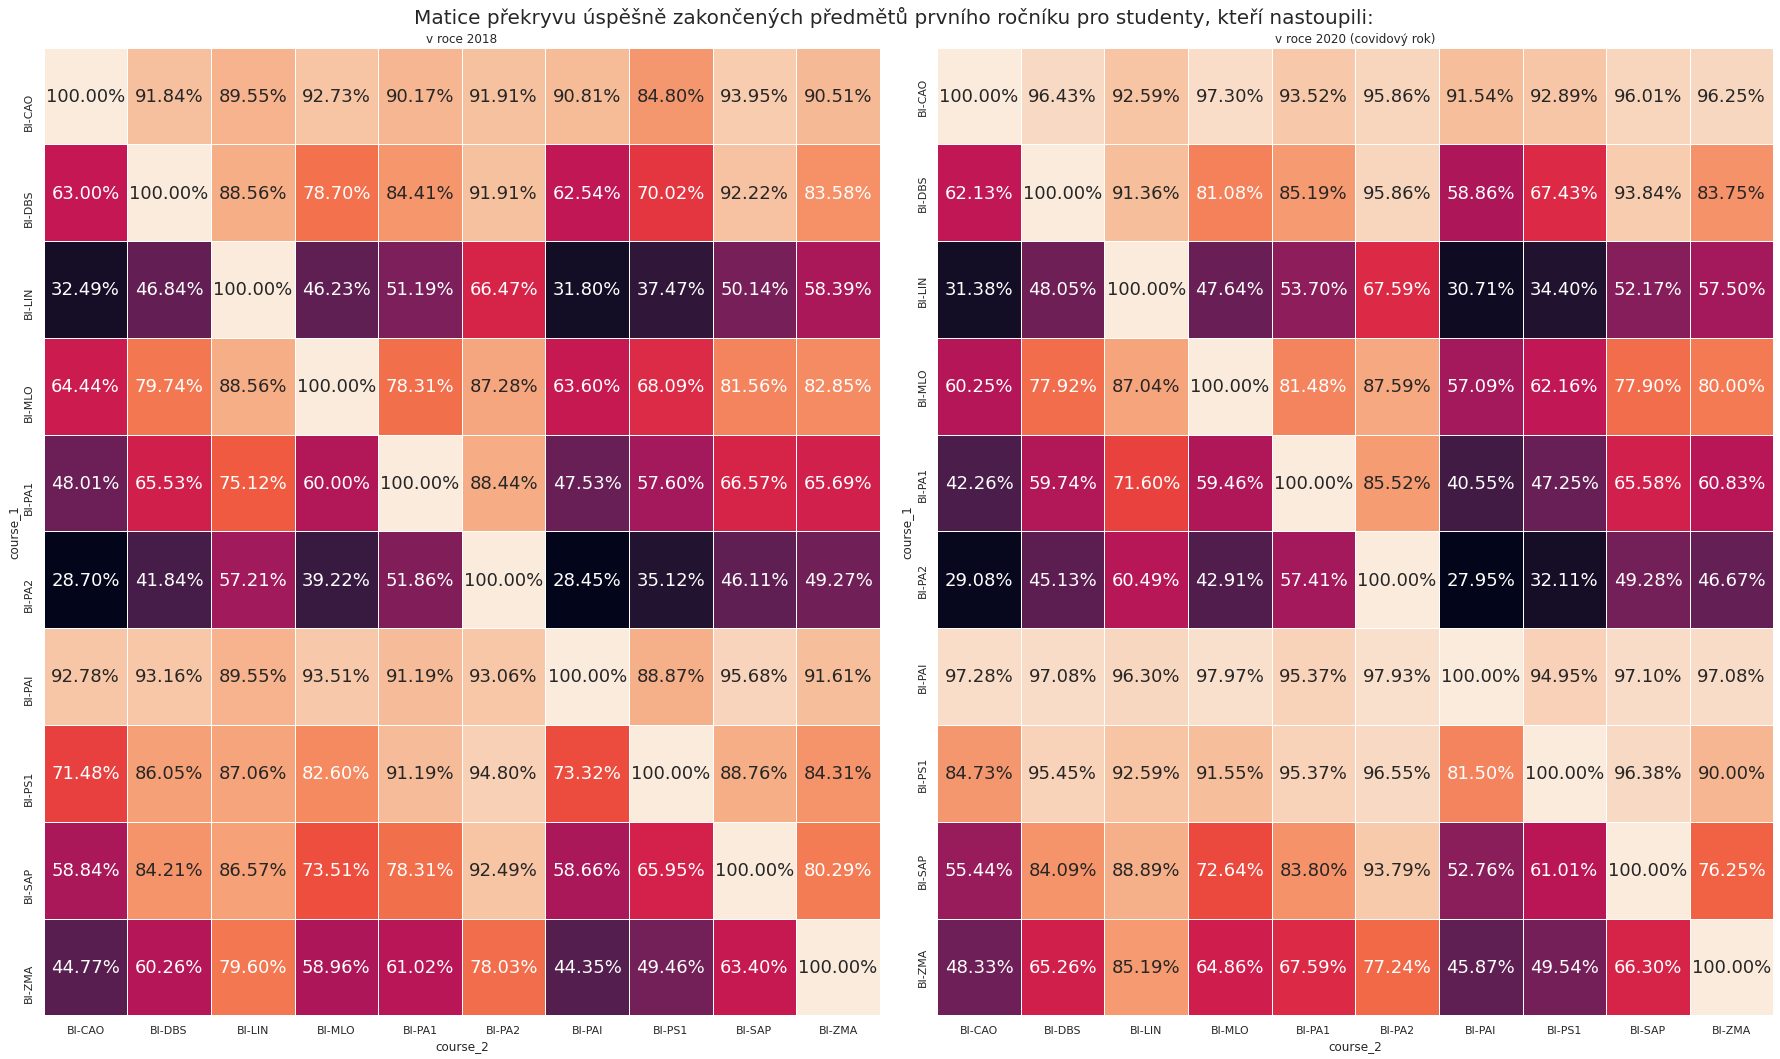

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(25,15))

plt.yticks(va="center")
sns.heatmap(pre_covid_2018_corr_matrix, ax=ax1, cbar=False, annot=True, annot_kws={"size": 18}, fmt='.2%', linewidths=.5)
ax1.set_title('v roce 2018')

plt.yticks(va="center")
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 18}, ax=ax2, cbar=False, fmt='.2%', linewidths=.5)
ax2.set_title('v roce 2020 (covidový rok)')

plt.suptitle('Matice překryvu úspěšně zakončených předmětů prvního ročníku pro studenty, kteří nastoupili:',fontsize=20)
fig.tight_layout()
sns.set(font_scale=1.5)

# Průchodnost

In [71]:
def get_pruchodnost(klasifikace_year, courses_top20):
    pruchodnost_prvaci_covid = pd.DataFrame(columns=['predmet', 'zapsano', 'zapocteno', 'zakonceno'])
    for course in courses_top20:
        pruchodnost_prvaci_covid = pruchodnost_prvaci_covid.append({'predmet': courses_tran_id_kod[int(course)],
                                    'zapsano': len(klasifikace_year[klasifikace_year.predmet_id == course]),
                                    'zapocteno': len(klasifikace_year[(klasifikace_year.predmet_id == course)
                                                                           & (klasifikace_year.zapocteno == 1)]),
                                    'zakonceno': len(klasifikace_year[(klasifikace_year.predmet_id == course)
                                                                           & (klasifikace_year.zakonceno == 1)])}, ignore_index=True)
    return pruchodnost_prvaci_covid

## Bakalář

### Prváci

#### 2020 nástup

In [72]:
students_2020_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()
klasifikace_2020_year = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                 | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2020_year = klasifikace_2020_year[klasifikace_2020_year.studium_id.isin(students_2020_ids)]

<ipython-input-72-4ab6d749b5c5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  students_2020_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)


In [73]:
courses_top20_2020_bc_ids = klasifikace_2020_year.predmet_id.value_counts().nlargest(20).index.unique()

In [74]:
pruchodnost_prvaci_2020 = get_pruchodnost(klasifikace_2020_year, courses_top20_2020_bc_ids)

In [75]:
pruchodnost_prvaci_2020

,predmet,zapsano,zapocteno,zakonceno
0,TV,850,846,846
1,BI-PA1,676,332,216
2,BI-PS1,648,436,436
3,BI-ULI,646,443,443
4,BI-ZMA,645,252,240
5,BI-PAI,638,0,508
6,BI-MLO,632,326,296
7,BI-CAO,617,491,478
8,BI-LIN,456,166,162
9,BI-DBS,453,310,308


#### nástup 2019

In [76]:
students_2019_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2019)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()
klasifikace_2019_year = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                 | (klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2019_year = klasifikace_2019_year[klasifikace_2019_year.studium_id.isin(students_2019_ids)]

<ipython-input-76-4c4d55aeb89e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  students_2019_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2019)


In [77]:
courses_top20_2019_bc_ids = klasifikace_2019_year.predmet_id.value_counts().nlargest(20).index.unique()

In [78]:
pruchodnost_prvaci_2019 = get_pruchodnost(klasifikace_2019_year, courses_top20_2019_bc_ids)

In [79]:
pruchodnost_prvaci_2019

,predmet,zapsano,zapocteno,zakonceno
0,TV,1087,773,773
1,BI-PA1,773,338,327
2,BI-ZMA,756,284,281
3,BI-PS1,741,425,425
4,BI-ULI,731,452,452
5,BI-MLO,723,382,375
6,BI-PAI,711,0,544
7,BI-CAO,684,530,509
8,BI-DBS,492,370,370
9,BI-LIN,474,216,202


#### 2018

In [80]:
students_2018_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()
klasifikace_2018_year = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B181')
                                                 | (klasifikace_fact_changed.semestr_id == 'B182')]
klasifikace_2018_year = klasifikace_2018_year[klasifikace_2018_year.studium_id.isin(students_2018_ids)]

<ipython-input-80-c089cc85a3ef>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  students_2018_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)


In [81]:
courses_top20_2018_bc_ids = klasifikace_2018_year.predmet_id.value_counts().nlargest(20).index.unique()

In [82]:
pruchodnost_prvaci_2018 = get_pruchodnost(klasifikace_2018_year, courses_top20_2018_bc_ids)

In [83]:
pruchodnost_prvaci_2018

,predmet,zapsano,zapocteno,zakonceno
0,TV,1057,749,749
1,BI-PA1,817,307,295
2,BI-PS1,809,467,467
3,BI-ZMA,806,291,274
4,BI-MLO,775,392,385
5,BI-PAI,771,0,566
6,BI-CAO,744,576,554
7,BI-ULI,706,458,458
8,BI-LIN,538,205,201
9,BI-DBS,520,382,380


### Druháci

#### 2020 nástup
* pouze zimní semestr

In [84]:
klasifikace_2020_year_second = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B211')]
klasifikace_2020_year_second = klasifikace_2020_year_second[klasifikace_2020_year_second.studium_id.isin(students_2020_ids)]

In [85]:
courses_top20_2020_bc_ids_second = klasifikace_2020_year_second.predmet_id.value_counts().nlargest(20).index.unique()

In [86]:
pruchodnost_druhaci_2020 = get_pruchodnost(klasifikace_2020_year_second, courses_top20_2020_bc_ids_second)

In [87]:
pruchodnost_druhaci_2020

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,283,167,162
1,BI-ZDM,275,169,165
2,BI-AG1,253,133,130
3,TV,177,100,100
4,NI-MPR,107,92,92
5,BI-TJV,99,73,73
6,BI-PPA,88,54,54
7,BI-PA1,83,58,58
8,BI-PJV,68,60,60
9,BI-ZMA,67,52,50


#### 2019 nástup

In [88]:
klasifikace_2019_year_second = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                 | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2019_year_second = klasifikace_2019_year_second[klasifikace_2019_year_second.studium_id.isin(students_2019_ids)]

In [89]:
courses_top20_2019_bc_ids_second = klasifikace_2019_year_second.predmet_id.value_counts().nlargest(20).index.unique()

In [90]:
pruchodnost_druhaci_2019 = get_pruchodnost(klasifikace_2019_year_second, courses_top20_2019_bc_ids_second)

In [91]:
pruchodnost_druhaci_2019

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,398,209,203
1,BI-ZDM,378,178,175
2,BI-AG1,363,156,153
3,TV,334,332,332
4,BI-PSI,274,193,190
5,BI-BEZ,265,201,197
6,BI-OSY,248,211,180
7,BI-SI1.2,182,161,150
8,BI-EMP,164,131,131
9,BI-ZMA,128,60,53


#### 2018 nástup

In [92]:
klasifikace_2018_year_second = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                 | (klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2018_year_second = klasifikace_2018_year_second[klasifikace_2018_year_second.studium_id.isin(students_2018_ids)]

In [93]:
courses_top20_2018_bc_ids_second = klasifikace_2018_year_second.predmet_id.value_counts().nlargest(20).index.unique()

In [94]:
pruchodnost_druhaci_2018 = get_pruchodnost(klasifikace_2018_year_second, courses_top20_2018_bc_ids_second)

In [95]:
pruchodnost_druhaci_2018

,predmet,zapsano,zapocteno,zakonceno
0,TV,379,284,284
1,BI-AAG,364,183,172
2,BI-ZDM,345,180,177
3,BI-AG1,311,161,158
4,BI-PSI,251,199,198
5,BI-BEZ,239,187,185
6,BI-OSY,226,200,190
7,BI-SI1.2,183,169,165
8,BI-PJV,153,137,135
9,BI-EMP,148,134,134


### Třetáci

#### 2019 nástup
* pouze zimní semestr

In [96]:
klasifikace_2019_year_third = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B211')]
klasifikace_2019_year_third = klasifikace_2019_year_third[klasifikace_2019_year_third.studium_id.isin(students_2019_ids)]

In [97]:
courses_top20_2019_bc_ids_third = klasifikace_2019_year_third.predmet_id.value_counts().nlargest(20).index.unique()

In [98]:
pruchodnost_tretaci_2019 = get_pruchodnost(klasifikace_2019_year_third, courses_top20_2019_bc_ids_third)

In [99]:
pruchodnost_tretaci_2019

,predmet,zapsano,zapocteno,zakonceno
0,BI-PST,179,167,163
1,BI-BPR,113,99,99
2,TV,106,61,61
3,BI-EMP,72,72,72
4,BI-SI2.3,68,64,64
5,BI-VZD,65,57,57
6,BI-SP2.1,64,64,64
7,BI-OOP,64,61,61
8,BI-AG1,59,46,47
9,BI-BIG,59,58,58


#### 2018 nástup

In [100]:
klasifikace_2018_year_third = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                      | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2018_year_third = klasifikace_2018_year_third[klasifikace_2018_year_third.studium_id.isin(students_2018_ids)]

In [101]:
courses_top20_2018_bc_ids_third = klasifikace_2018_year_third.predmet_id.value_counts().nlargest(20).index.unique()

In [102]:
pruchodnost_tretaci_2018 = get_pruchodnost(klasifikace_2018_year_third, courses_top20_2018_bc_ids_third)

In [103]:
pruchodnost_tretaci_2018

,predmet,zapsano,zapocteno,zakonceno
0,BI-PST,221,198,194
1,TV,185,185,185
2,BI-BPR,153,129,129
3,BI-DPR,133,119,119
4,BI-BAP,122,112,112
5,BI-EMP,121,107,107
6,BI-AG1,91,59,58
7,BI-AAG,91,75,75
8,BI-ZDM,83,61,60
9,BI-SI1.2,81,72,72


## Magistr

### Prváci

#### 2020 nástup

In [104]:
students_2020_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)
                                                 & (studium_dim.typ_programu == 'N')].studium_id.unique()
klasifikace_2020_year_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                 | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2020_year_mgr = klasifikace_2020_year_mgr[klasifikace_2020_year_mgr.studium_id.isin(students_2020_ids_mgr)]

<ipython-input-104-35c7f2d17ed3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  students_2020_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)


In [105]:
courses_top20_2020_mgr_ids = klasifikace_2020_year_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [106]:
pruchodnost_prvaci_2020_mgr = get_pruchodnost(klasifikace_2020_year_mgr, courses_top20_2020_mgr_ids)

In [107]:
pruchodnost_prvaci_2020_mgr

,predmet,zapsano,zapocteno,zakonceno
0,TV,171,171,171
1,BI-PA1,151,84,51
2,BI-ULI,148,107,107
3,BI-PS1,148,118,118
4,BI-ZMA,145,45,44
5,BI-MLO,144,93,90
6,BI-PAI,144,0,132
7,BI-CAO,140,128,126
8,BI-DBS,134,113,113
9,BI-LIN,130,40,38


#### 2019 nástup

In [108]:
students_2019_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2019)
                                                 & (studium_dim.typ_programu == 'N')].studium_id.unique()
klasifikace_2019_year_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                 | (klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2019_year_mgr = klasifikace_2019_year_mgr[klasifikace_2019_year_mgr.studium_id.isin(students_2019_ids_mgr)]

<ipython-input-108-eef9f58cdbcd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  students_2019_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2019)


In [109]:
courses_top20_2019_mgr_ids = klasifikace_2019_year_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [110]:
pruchodnost_prvaci_2019_mgr = get_pruchodnost(klasifikace_2019_year_mgr, courses_top20_2019_mgr_ids)

In [111]:
pruchodnost_prvaci_2019_mgr

,predmet,zapsano,zapocteno,zakonceno
0,TV,153,97,97
1,BI-ZMA,78,34,33
2,BI-ULI,77,51,51
3,BI-PAI,76,0,66
4,BI-PA1,76,41,41
5,BI-PS1,75,51,51
6,BI-MLO,73,47,46
7,BI-CAO,65,58,56
8,BI-DBS,63,51,51
9,BI-LIN,62,34,33


#### 2018 nástup

In [112]:
students_2018_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)
                                                 & (studium_dim.typ_programu == 'N')].studium_id.unique()
klasifikace_2018_year_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B181')
                                                 | (klasifikace_fact_changed.semestr_id == 'B182')]
klasifikace_2018_year_mgr = klasifikace_2018_year_mgr[klasifikace_2018_year_mgr.studium_id.isin(students_2018_ids_mgr)]

<ipython-input-112-4b0a65b20823>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  students_2018_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)


In [113]:
courses_top20_2018_mgr_ids = klasifikace_2018_year_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [114]:
pruchodnost_prvaci_2018_mgr = get_pruchodnost(klasifikace_2018_year_mgr, courses_top20_2018_mgr_ids)

In [115]:
pruchodnost_prvaci_2018_mgr

,predmet,zapsano,zapocteno,zakonceno
0,TV,112,80,80
1,BI-PS1,78,52,52
2,BI-PA1,78,38,37
3,BI-MLO,77,48,46
4,BI-ZMA,77,35,33
5,BI-CAO,76,61,60
6,BI-PAI,76,0,60
7,BI-ULI,69,46,46
8,MI-PAA,62,20,18
9,MI-MPI,61,23,18


### Druháci

#### 2020 nástup
* pouze zimní semestr

In [116]:
klasifikace_2020_year_second_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B211')]
klasifikace_2020_year_second_mgr = klasifikace_2020_year_second_mgr[klasifikace_2020_year_second_mgr.studium_id.isin(students_2020_ids_mgr)]

In [117]:
courses_top20_2020_mgr_ids_second = klasifikace_2020_year_second_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [118]:
pruchodnost_druhaci_2020_mgr = get_pruchodnost(klasifikace_2020_year_second_mgr, courses_top20_2020_mgr_ids_second)

In [119]:
pruchodnost_druhaci_2020_mgr

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,97,39,37
1,BI-ZDM,88,40,40
2,BI-AG1,79,28,28
3,BI-ZMA,62,13,13
4,BI-PA1,58,29,27
5,TV,35,21,21
6,BI-TJV,26,14,14
7,BI-MLO,24,13,11
8,BI-EMP,19,19,19
9,BI-PJV,17,15,15


#### 2019 nástup

In [120]:
klasifikace_2019_year_second_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                           |(klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2019_year_second_mgr = klasifikace_2019_year_second_mgr[klasifikace_2019_year_second_mgr.studium_id.isin(students_2019_ids_mgr)]

In [121]:
courses_top20_2019_mgr_ids_second = klasifikace_2019_year_second_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [122]:
pruchodnost_druhaci_2019_mgr = get_pruchodnost(klasifikace_2019_year_second_mgr, courses_top20_2019_mgr_ids_second)

In [123]:
pruchodnost_druhaci_2019_mgr

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,61,34,34
1,TV,61,61,61
2,BI-ZDM,59,26,26
3,BI-AG1,55,26,25
4,BI-BEZ,42,34,33
5,BI-PSI,42,35,35
6,BI-OSY,41,37,34
7,BI-SI1.2,35,33,33
8,NI-MPR,33,27,27
9,BI-EMP,26,21,21


#### 2018 nástup

In [124]:
klasifikace_2018_year_second_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                           |(klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2018_year_second_mgr = klasifikace_2018_year_second_mgr[klasifikace_2018_year_second_mgr.studium_id.isin(students_2018_ids_mgr)]

In [125]:
courses_top20_2018_mgr_ids_second = klasifikace_2018_year_second_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [126]:
pruchodnost_druhaci_2018_mgr = get_pruchodnost(klasifikace_2018_year_second_mgr, courses_top20_2018_mgr_ids_second)

In [127]:
pruchodnost_druhaci_2018_mgr

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,44,23,22
1,BI-ZDM,40,23,23
2,TV,38,28,28
3,BI-AG1,37,24,24
4,BI-PSI,35,32,32
5,BI-OSY,32,27,26
6,BI-BEZ,32,25,25
7,BI-SI1.2,24,21,21
8,BI-EMP,23,19,19
9,MI-MPR,18,12,12
